# How to avoid Flanders?
## places Homer Simpson shouldn't go

The following analysis is based on a kaggle dataset that listed all spoken words in the Simpson TV show. Furthermore it tells who has spoken and where was spoken. So it is easy to find out when and how often Homer and Flanders met at specific locations.

Homer hates Flanders! So I thought I could help the hero of my childhood to have a nicer everyday life.

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### The raw data looks like this

In [2]:
df = pd.read_csv('simpsons_script_lines.csv')
df.drop(df.columns[-14:], 1, inplace=True)
df['character_id'] = pd.to_numeric(df['character_id'], errors='coerse')
df['location_id'] = pd.to_numeric(df['location_id'], errors='coerse')
df['episode_id'] = pd.to_numeric(df['episode_id'], errors='coerse')
df.head()

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,13,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,true,464.0,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,true,9.0,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,true,464.0,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,true,9.0,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,true,40.0,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33


### Locations Homer and Flanders met ordered by the frequency of meetings

In [3]:
df['episode_location_id'] = df['episode_id'].astype(str)+'_'+df['location_id'].astype(str)
homer = df.loc[df['character_id'] == 2].drop_duplicates(['episode_id', 'location_id'])
flanders = df.loc[df['character_id'] == 11].drop_duplicates(['episode_id', 'location_id'])

meetings_tops = pd.merge(left=homer, right=flanders, how='inner', on='episode_location_id')['raw_location_text_x'].value_counts().to_frame()
meetings_tops['location name'] = meetings_tops.index
meetings_tops.rename(columns = {'raw_location_text_x': 'frequency'}, inplace=True)
meetings_tops

,frequency,location name
Simpson Home,119,Simpson Home
Flanders Home,38,Flanders Home
First Church of Springfield,17,First Church of Springfield
Springfield Street,10,Springfield Street
Simpson Backyard,9,Simpson Backyard
Evergreen Terrace,7,Evergreen Terrace
Moe's Tavern,6,Moe's Tavern
Springfield Town Hall,6,Springfield Town Hall
Springfield Nuclear Power Plant,5,Springfield Nuclear Power Plant
Simpson Living Room,5,Simpson Living Room


### Homer's top locations

In [4]:
homers_tops = homer['raw_location_text'].value_counts().to_frame()
homers_tops['location name'] = homers_tops.index
homers_tops.rename(columns={'raw_location_text': 'frequency'}, inplace=True)
homers_tops

,frequency,location name
Simpson Home,532,Simpson Home
Moe's Tavern,199,Moe's Tavern
Springfield Nuclear Power Plant,148,Springfield Nuclear Power Plant
Simpson Car,99,Simpson Car
Simpson Living Room,75,Simpson Living Room
Springfield Street,69,Springfield Street
Street,67,Street
Homer's Car,63,Homer's Car
Kwik-E-Mart,57,Kwik-E-Mart
Car,53,Car


### Flanders' top locations

In [5]:
flanders_tops = flanders['raw_location_text'].value_counts().to_frame()
flanders_tops['location name'] = flanders_tops.index
flanders_tops.rename(columns={'raw_location_text': 'frequency_flanders'}, inplace=True)
flanders_tops

,frequency_flanders,location name
Simpson Home,121,Simpson Home
Flanders Home,64,Flanders Home
First Church of Springfield,28,First Church of Springfield
Evergreen Terrace,14,Evergreen Terrace
Springfield Street,12,Springfield Street
Simpson Backyard,9,Simpson Backyard
Springfield Town Hall,7,Springfield Town Hall
Street,7,Street
Moe's Tavern,6,Moe's Tavern
Kwik-E-Mart,6,Kwik-E-Mart


# Now the result
### The danger rate was calculated as follows:

([number of location meetings]/[number of location visits by homer])x([number of location visits by flanders]/[sum of all visits by flanders])

In [6]:
frequency_comparison = pd.merge(homers_tops, meetings_tops, how='left', on='location name', suffixes=('_homer', '_meetings')).fillna(0)
frequency_comparison = pd.merge(frequency_comparison, flanders_tops, how='left', on='location name').fillna(0)
frequency_comparison['danger_rate'] = (frequency_comparison['frequency_meetings']/frequency_comparison['frequency_homer'])*(frequency_comparison['frequency_flanders']/frequency_comparison['frequency_flanders'].sum())
frequency_comparison.dropna(inplace=True)
frequency_comparison.sort_values(by='danger_rate', ascending=False)

,frequency_homer,location name,frequency_meetings,frequency_flanders,danger_rate
14,40,Flanders Home,38.0,64.0,0.103401
0,532,Simpson Home,119.0,121.0,0.046030
12,50,First Church of Springfield,17.0,28.0,0.016190
2063,1,Flanders's Car,1.0,6.0,0.010204
506,1,Flanders Master Bedroom,1.0,3.0,0.005102
987,1,Flanders Backyard,1.0,3.0,0.005102
1505,1,Flanders Bedroom,1.0,3.0,0.005102
2146,1,Flanders Garage,1.0,3.0,0.005102
303,2,Flanders Living Room,2.0,3.0,0.005102
1515,1,FLANDERS' YARD,1.0,3.0,0.005102


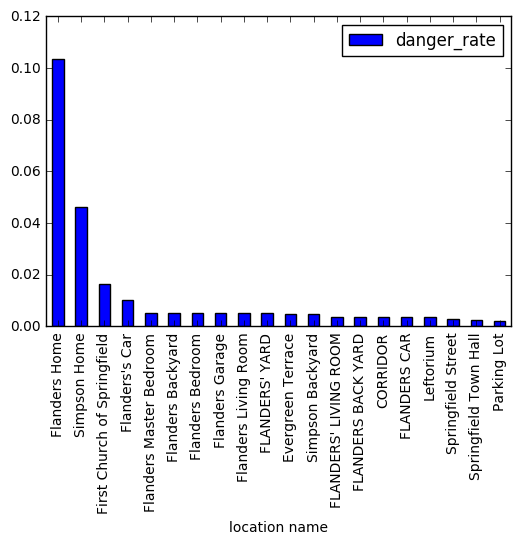

In [13]:
frequency_comparison.sort_values(by='danger_rate', ascending=False)[['location name', 'danger_rate']][0:20].plot.bar(x='location name')

# Now guess what:

Homer shouldn't going to Flanders' home to be able to avoid him. But (!) he shouldn't even go to his own home. You know, they are neighbours and that's why Flanders often appears.

As you can see, there are a lot of locations like **Flanders' Bedroom**, **Flanders' Garage** or **Flanders' Backyard**. We could combine all those rows to get a much higher danger rate at **Flanders' Home**.

### Future steps:
#### Draw those locations on a map to have a nice visualization